This notebook generates figures illustrating scaling across thermal diffusivities k of the heat equation with Dirichlet boundary conditions, as described in Supplementary Material Section 3. The data is generated using `1-Step-Generate.ipynb`, by changing k values and coorrepsoding saving file name.

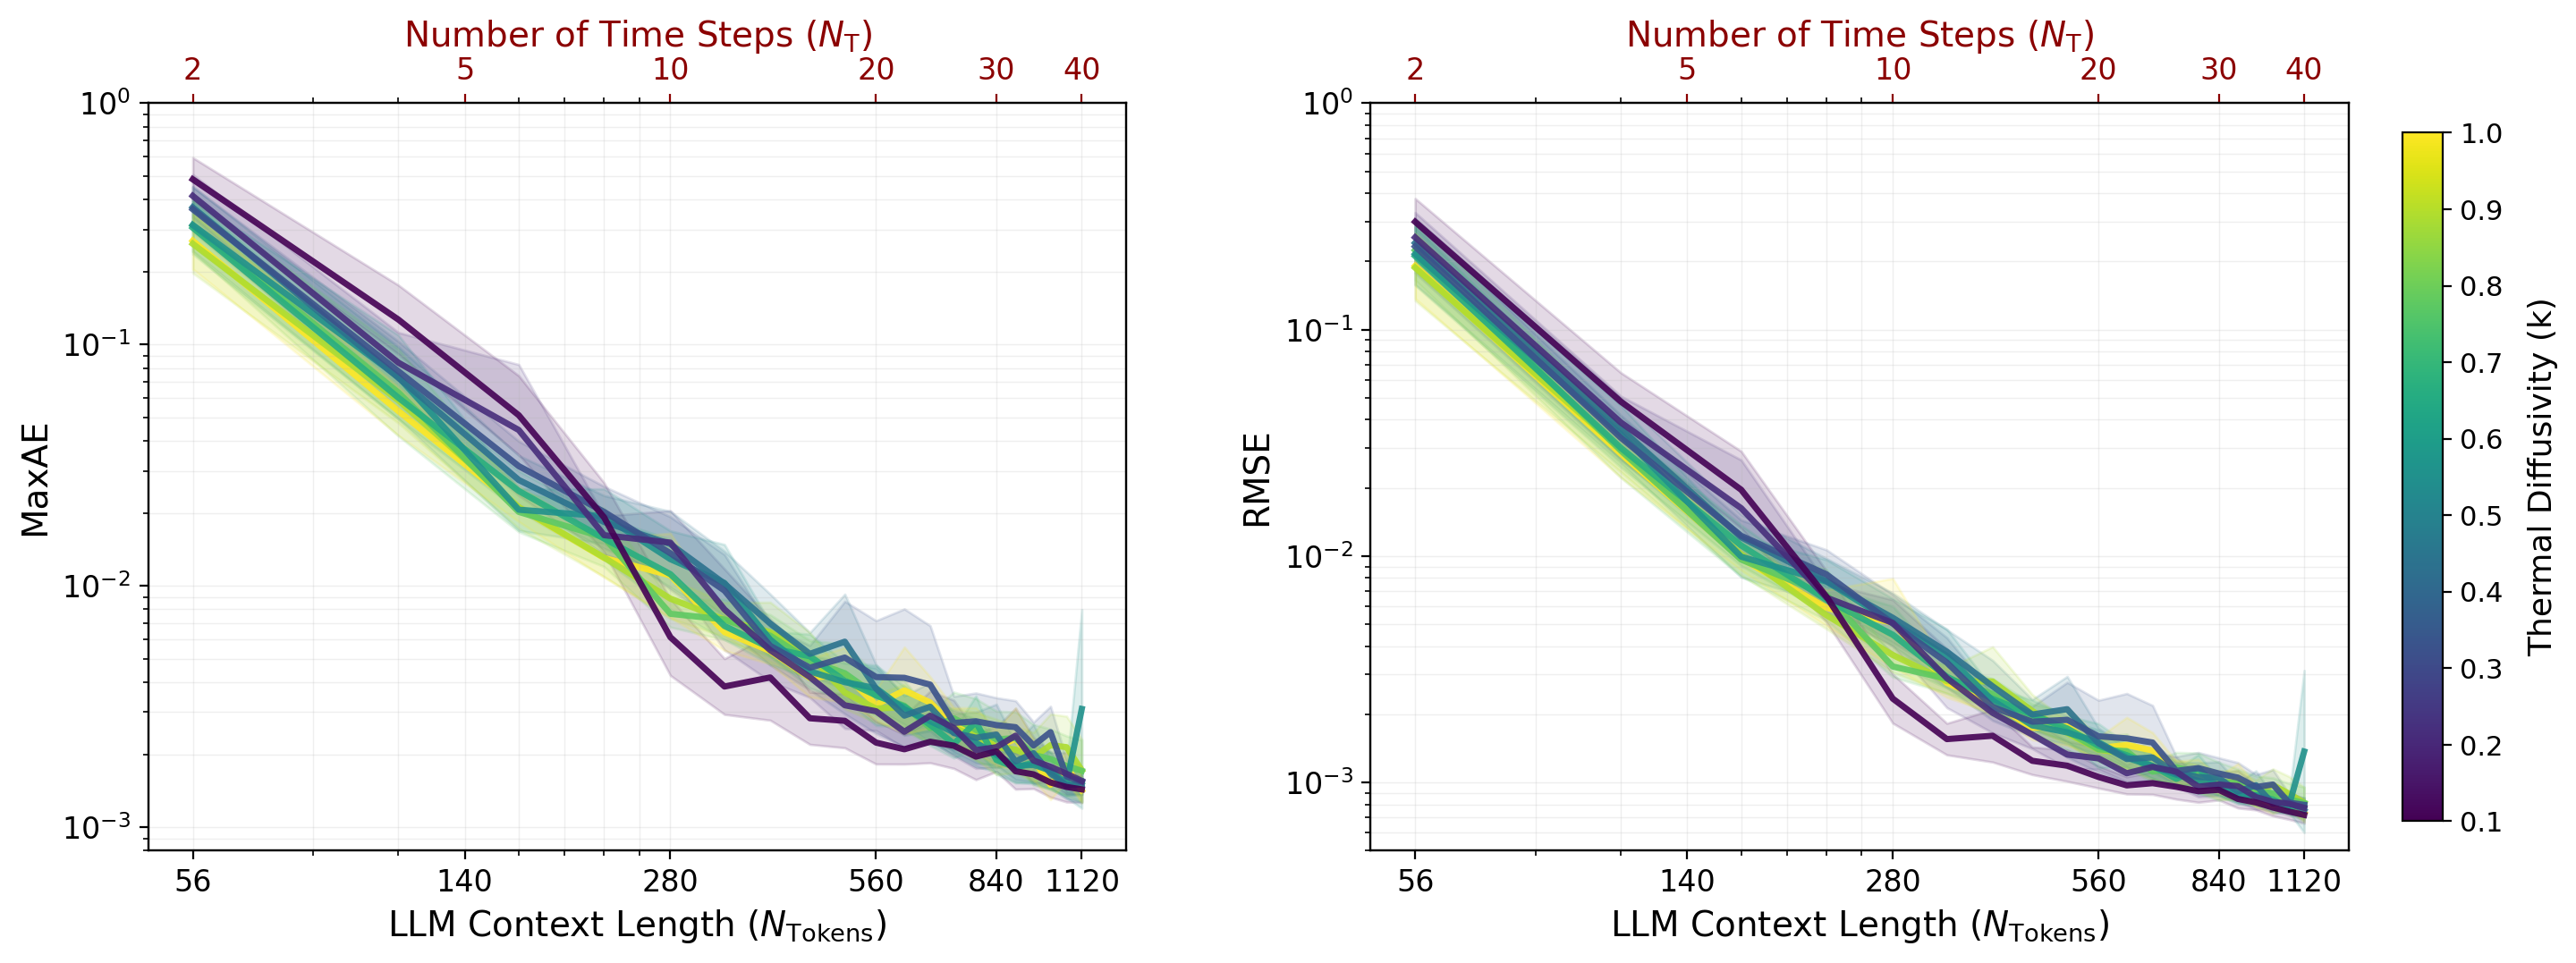

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

k_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
all_Nt_values = range(2, 41, 2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5.5), dpi=200)
cmap = plt.colormaps['viridis']
colors = [cmap(i / (len(k_values) - 1)) for i in range(len(k_values))]
for idx, k in enumerate(k_values):
    filename = f"k_{k:.2f}_time_discretization.npz"
    with np.load(filename) as data:
        llm_final_max_diff = data["llm_final_max_diff_3B"]
        llm_final_rmse = data["llm_final_rmse_3B"]
        lower_max_diff = data["llm_lower_max_diff_log_3B"]
        upper_max_diff = data["llm_upper_max_diff_log_3B"]
        lower_rmse = data["llm_lower_rmse_log_3B"]
        upper_rmse = data["llm_upper_rmse_log_3B"]
    ax1.loglog(all_Nt_values, llm_final_max_diff, '-', 
               label=f'k = {k:.2f}', color=colors[idx], 
               linewidth=2.5, alpha=0.9, zorder=len(k_values) - idx)
    ax1.fill_between(all_Nt_values, lower_max_diff, upper_max_diff,
                      alpha=0.15, color=colors[idx])
    ax2.loglog(all_Nt_values, llm_final_rmse, '-', 
               label=f'k = {k:.2f}', color=colors[idx], 
               linewidth=2.5, alpha=0.9, zorder=len(k_values) - idx)
    ax2.fill_between(all_Nt_values, lower_rmse, upper_rmse,
                     alpha=0.15, color=colors[idx])
ax1.set_ylabel("MaxAE", fontsize=14, fontweight='medium')
ax1.set_xlabel("LLM Context Length ($N_{\\text{Tokens}}$)", fontsize=14)
ax1.grid(True, which="both", ls="-", alpha=0.2, linewidth=0.5)
ax2.set_ylabel("RMSE", fontsize=14, fontweight='medium')
ax2.set_xlabel("LLM Context Length ($N_{\\text{Tokens}}$)", fontsize=14)
ax2.grid(True, which="both", ls="-", alpha=0.2, linewidth=0.5)
ax1.set_ylim(8e-4, 1e0)
ax2.set_ylim(5e-4, 1e0)
key_ticks = [2, 5, 10, 20, 30, 40]
token_ticks = [nt * 28 for nt in key_ticks]
for ax in [ax1, ax2]:
    ax.set_xticks(key_ticks)
    ax.set_xticklabels(token_ticks)
    ax.tick_params(axis='both', which='major', labelsize=12)
ax1_top = ax1.twiny()
ax2_top = ax2.twiny()
for ax_top, ax_bottom in [(ax1_top, ax1), (ax2_top, ax2)]:
    ax_top.set_xlim(ax_bottom.get_xlim())
    ax_top.set_xscale('log')
    ax_top.set_xticks(key_ticks)
    ax_top.set_xticklabels(key_ticks)
    ax_top.set_xlabel("Number of Time Steps ($N_\\text{T}$)", 
                      fontsize=14, color='darkred')
    ax_top.tick_params(axis='x', which='major', labelsize=12, colors='darkred')
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0.1, vmax=1.0))
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical')
cbar.set_label('Thermal Diﬀusivity (k)', fontsize=13, fontweight='medium', labelpad=10)
cbar.ax.tick_params(labelsize=11)
plt.subplots_adjust(left=0.08, right=0.90, top=0.88, bottom=0.12, wspace=0.25)
plt.show()

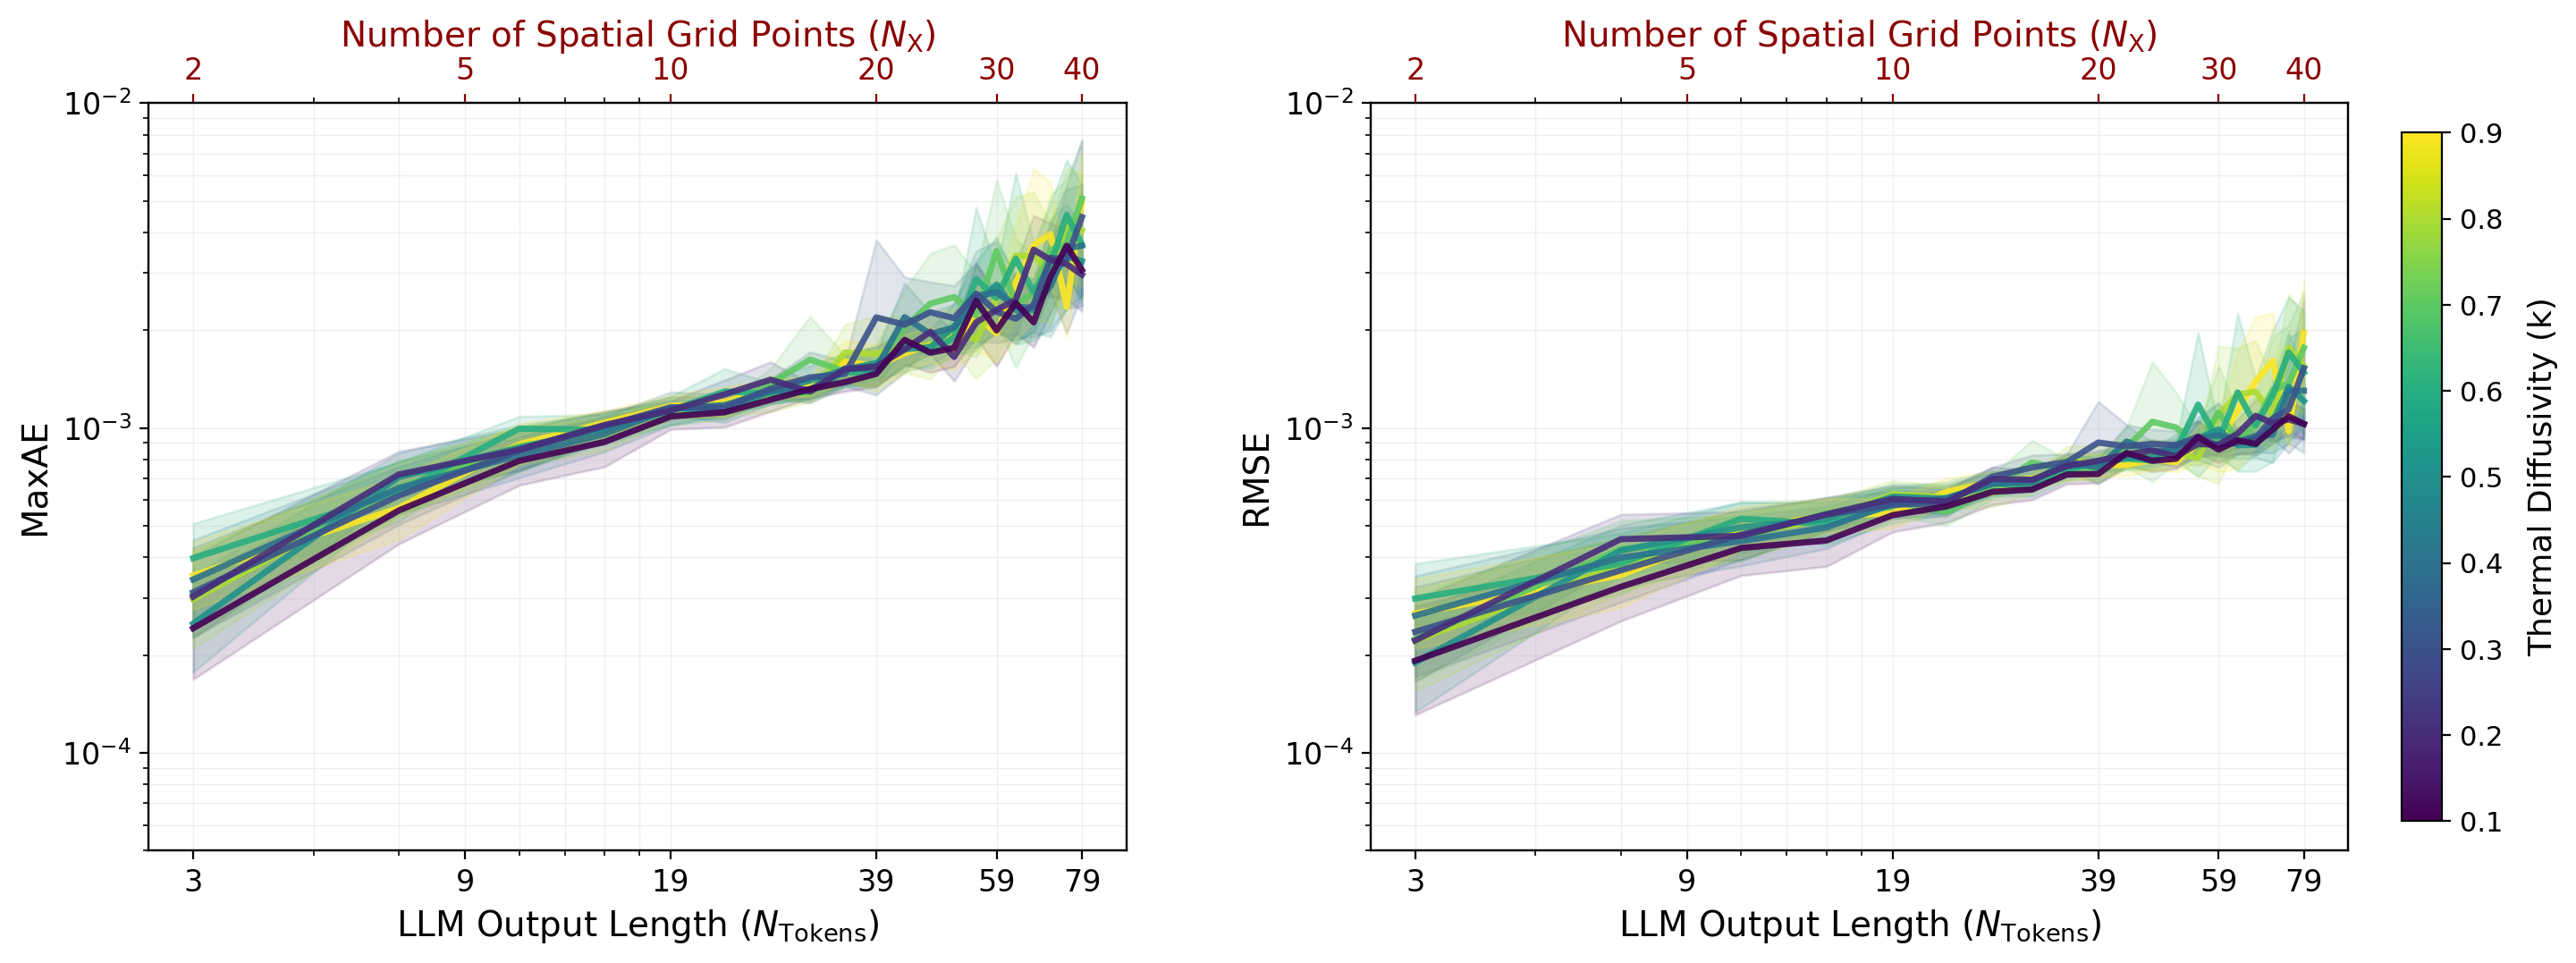

In [2]:
k_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
all_Nx_values = range(2, 41, 2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5.5), dpi=200)
cmap = plt.colormaps['viridis']
colors = [cmap(i / (len(k_values) - 1)) for i in range(len(k_values))]
for idx, k in enumerate(k_values):
    filename = f"k_{k:.2f}_space_discretization.npz"
    with np.load(filename) as data:
        llm_final_max_diff = data["llm_final_max_diff_3B"]
        llm_final_rmse = data["llm_final_rmse_3B"]
        lower_max_diff = data["llm_lower_max_diff_log_3B"]
        upper_max_diff = data["llm_upper_max_diff_log_3B"]
        lower_rmse = data["llm_lower_rmse_log_3B"]
        upper_rmse = data["llm_upper_rmse_log_3B"]
    ax1.loglog(all_Nx_values, llm_final_max_diff, '-', 
               label=f'k = {k:.2f}', color=colors[idx], 
               linewidth=2.5, alpha=0.9, zorder=len(k_values) - idx)
    ax1.fill_between(all_Nx_values, lower_max_diff, upper_max_diff,
                      alpha=0.15, color=colors[idx])
    ax2.loglog(all_Nx_values, llm_final_rmse, '-', 
               label=f'k = {k:.2f}', color=colors[idx], 
               linewidth=2.5, alpha=0.9, zorder=len(k_values) - idx)
    ax2.fill_between(all_Nx_values, lower_rmse, upper_rmse,
                     alpha=0.15, color=colors[idx])
ax1.set_ylabel("MaxAE", fontsize=14, fontweight='medium')
ax1.set_xlabel("LLM Output Length ($N_{\\text{Tokens}}$)", fontsize=14)
ax1.grid(True, which="both", ls="-", alpha=0.2, linewidth=0.5)
ax2.set_ylabel("RMSE", fontsize=14, fontweight='medium')
ax2.set_xlabel("LLM Output Length ($N_{\\text{Tokens}}$)", fontsize=14)
ax2.grid(True, which="both", ls="-", alpha=0.2, linewidth=0.5)
ax1.set_ylim(5e-5, 1e-2)
ax2.set_ylim(5e-5, 1e-2)
key_ticks = [2, 5, 10, 20, 30, 40]
token_ticks = [2*nx - 1 for nx in key_ticks]
for ax in [ax1, ax2]:
    ax.set_xticks(key_ticks)
    ax.set_xticklabels(token_ticks)
    ax.tick_params(axis='both', which='major', labelsize=12)
ax1_top = ax1.twiny()
ax2_top = ax2.twiny()
for ax_top, ax_bottom in [(ax1_top, ax1), (ax2_top, ax2)]:
    ax_top.set_xlim(ax_bottom.get_xlim())
    ax_top.set_xscale('log')
    ax_top.set_xticks(key_ticks)
    ax_top.set_xticklabels(key_ticks)
    ax_top.set_xlabel("Number of Spatial Grid Points ($N_\\text{X}$)", 
                      fontsize=14, color='darkred')
    ax_top.tick_params(axis='x', which='major', labelsize=12, colors='darkred')
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0.1, vmax=0.9))
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical')
cbar.set_label('Thermal Diﬀusivity (k)', fontsize=13, fontweight='medium', labelpad=10)
cbar.ax.tick_params(labelsize=11)
plt.subplots_adjust(left=0.08, right=0.90, top=0.88, bottom=0.12, wspace=0.25)
plt.show()

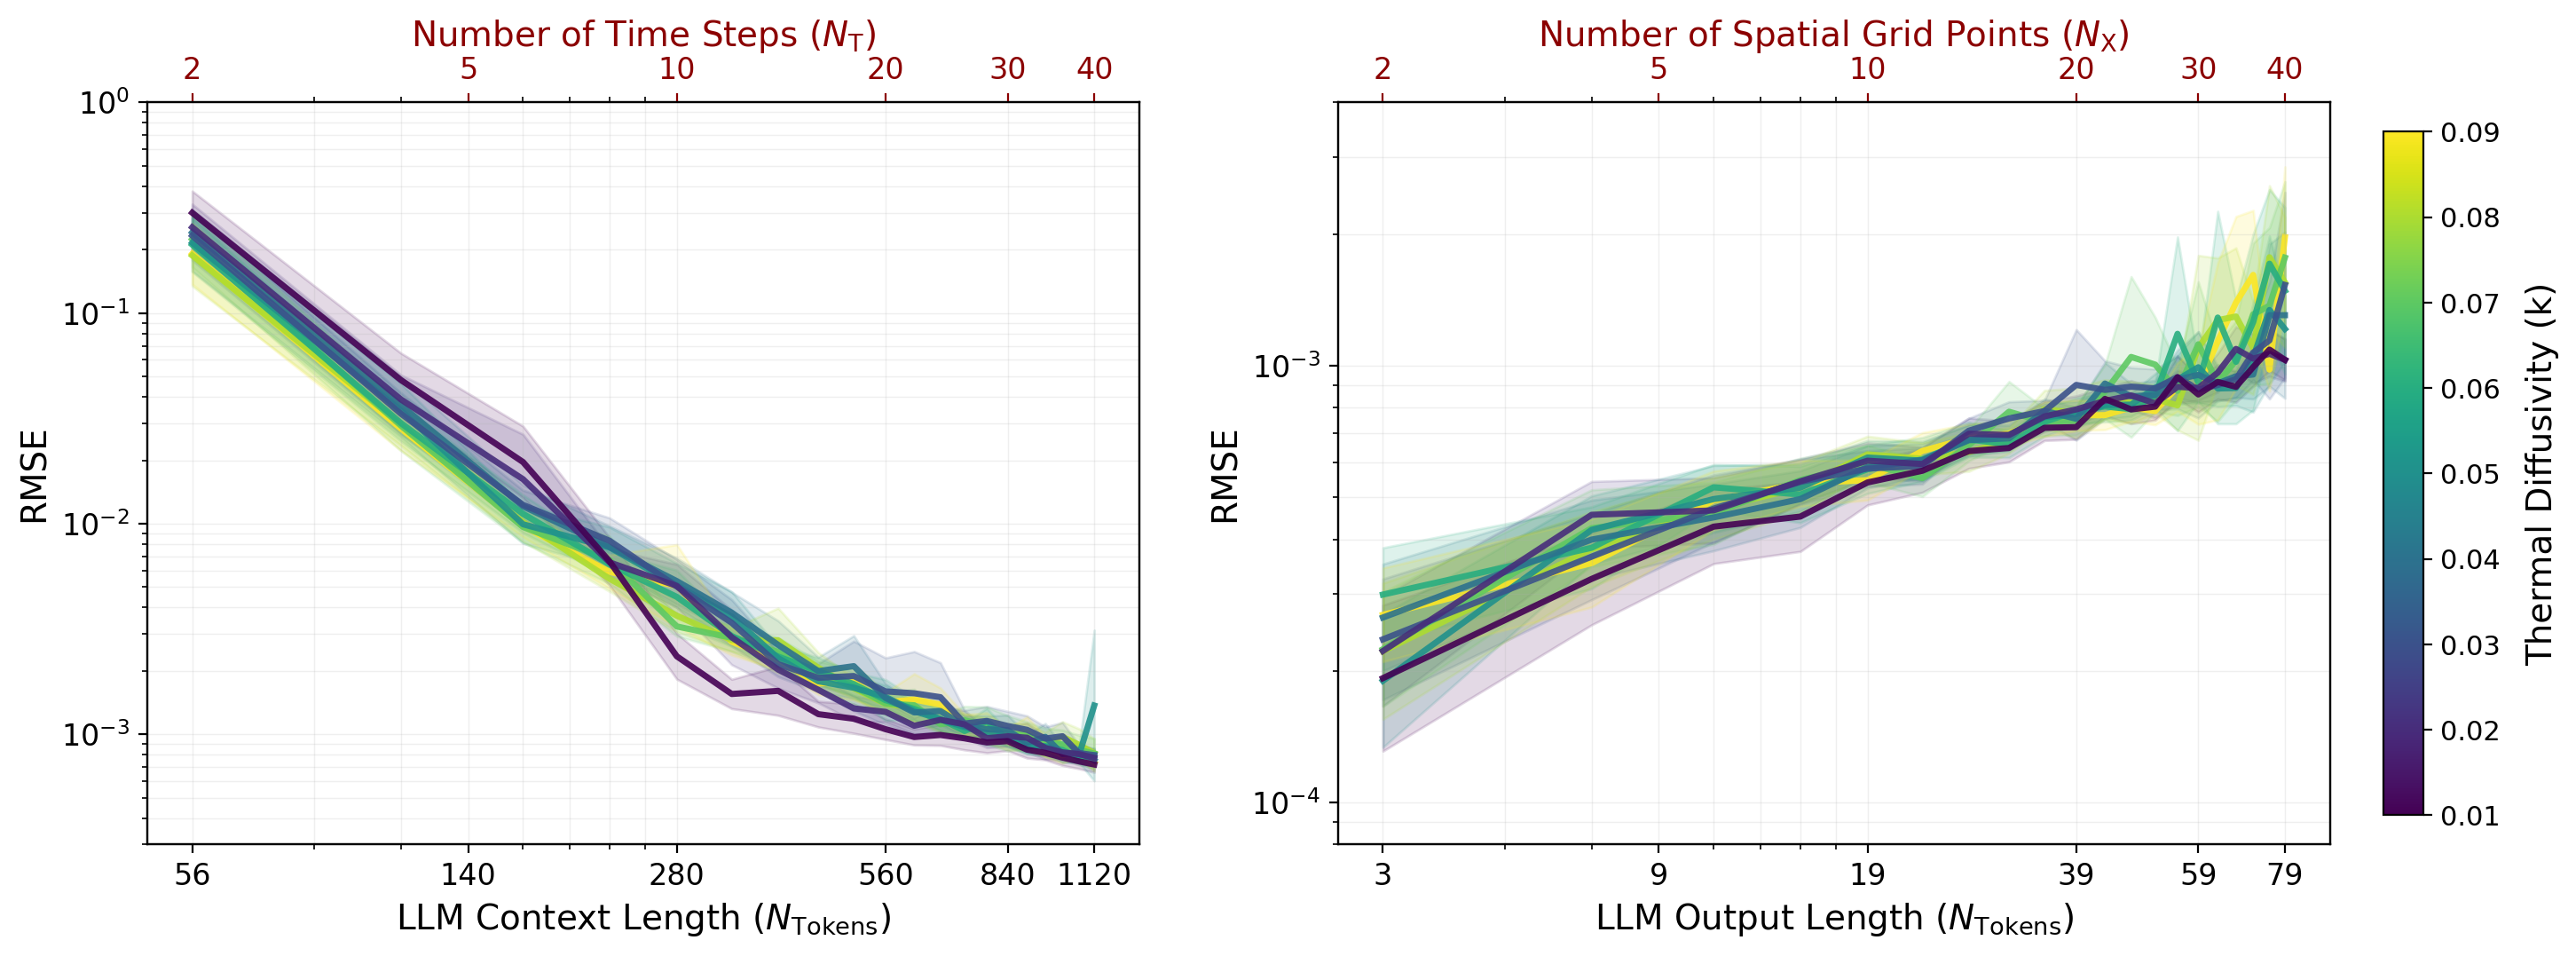

In [ ]:
k_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
all_Nt_values = range(2, 41, 2)
all_Nx_values = range(2, 41, 2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5.5), dpi=200)
cmap = plt.colormaps['viridis']
colors = [cmap(i / (len(k_values) - 1)) for i in range(len(k_values))]
for idx, k in enumerate(k_values):
    filename = f"k_{k:.2f}_time_discretization.npz"
    with np.load(filename) as data:
        llm_final_rmse = data["llm_final_rmse_3B"]
        lower_rmse = data["llm_lower_rmse_log_3B"]
        upper_rmse = data["llm_upper_rmse_log_3B"]
    ax1.loglog(all_Nt_values, llm_final_rmse, '-', 
               label=f'k = {k:.2f}', color=colors[idx], 
               linewidth=2.5, alpha=0.9, zorder=len(k_values) - idx)
    ax1.fill_between(all_Nt_values, lower_rmse, upper_rmse,
                      alpha=0.15, color=colors[idx])
for idx, k in enumerate(k_values):
    filename = f"k_{k:.2f}_space_discretization.npz"
    with np.load(filename) as data:
        llm_final_rmse = data["llm_final_rmse_3B"]
        lower_rmse = data["llm_lower_rmse_log_3B"]
        upper_rmse = data["llm_upper_rmse_log_3B"]
    ax2.loglog(all_Nx_values, llm_final_rmse, '-', 
               label=f'k = {k:.2f}', color=colors[idx], 
               linewidth=2.5, alpha=0.9, zorder=len(k_values) - idx)
    ax2.fill_between(all_Nx_values, lower_rmse, upper_rmse,
                     alpha=0.15, color=colors[idx])
ax1.set_ylabel("RMSE", fontsize=14, fontweight='medium')
ax1.set_xlabel("LLM Context Length ($N_{\\text{Tokens}}$)", fontsize=14)
ax1.grid(True, which="both", ls="-", alpha=0.2, linewidth=0.5)
ax2.set_ylabel("RMSE", fontsize=14, fontweight='medium')
ax2.set_xlabel("LLM Output Length ($N_{\\text{Tokens}}$)", fontsize=14)
ax2.grid(True, which="both", ls="-", alpha=0.2, linewidth=0.5)
ax1.set_ylim(3e-4, 1e0)
ax2.set_ylim(8e-5, 4e-3)
key_ticks = [2, 5, 10, 20, 30, 40]
token_ticks_time = [nt * 28 for nt in key_ticks]
ax1.set_xticks(key_ticks)
ax1.set_xticklabels(token_ticks_time)
ax1.tick_params(axis='both', which='major', labelsize=12)
token_ticks_space = [2*nx - 1 for nx in key_ticks]
ax2.set_xticks(key_ticks)
ax2.set_xticklabels(token_ticks_space)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax1_top = ax1.twiny()
ax1_top.set_xlim(ax1.get_xlim())
ax1_top.set_xscale('log')
ax1_top.set_xticks(key_ticks)
ax1_top.set_xticklabels(key_ticks)
ax1_top.set_xlabel("Number of Time Steps ($N_\\text{T}$)", 
                   fontsize=14, color='darkred')
ax1_top.tick_params(axis='x', which='major', labelsize=12, colors='darkred')
ax2_top = ax2.twiny()
ax2_top.set_xlim(ax2.get_xlim())
ax2_top.set_xscale('log')
ax2_top.set_xticks(key_ticks)
ax2_top.set_xticklabels(key_ticks)
ax2_top.set_xlabel("Number of Spatial Grid Points ($N_\\text{X}$)",
                   fontsize=14, color='darkred')
ax2_top.tick_params(axis='x', which='major', labelsize=12, colors='darkred')
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0.01, vmax=0.09))
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical')
cbar.set_label('Thermal Diﬀusivity (k)', fontsize=14, fontweight='medium', labelpad=10)
cbar.ax.tick_params(labelsize=11)
plt.subplots_adjust(left=0.08, right=0.90, top=0.88, bottom=0.12, wspace=0.2)
plt.show()